In [1]:
import seaborn as sns
import numpy as np
from mesa.datacollection import DataCollector
from mesa import Agent, Model
from mesa.time import RandomActivation
from mesa.space import MultiGrid


In [10]:
#Answer

from mesa.datacollection import DataCollector

from mesa import Agent, Model
from mesa.time import RandomActivation
from mesa.space import MultiGrid


def compute_gini(model):
    agent_wealths = [agent.wealth for agent in model.schedule.agents]
    x = sorted(agent_wealths)
    N = model.num_agents
    B = sum( xi * (N-i) for i,xi in enumerate(x) ) / (N*sum(x))
    return (1 + (1/N) - 2*B)


#TO COMPLETE
from mesa.datacollection import DataCollector

#Answer

from mesa import Agent, Model
from mesa.time import RandomActivation
from mesa.space import MultiGrid

#TO COMPLETE
class SimpleRobot(Agent):
    def __init__(self, unique_id, model, initial_wealth=1):
        super().__init__(unique_id, model)
        #... define local variables here ...
        self.unique_id = unique_id
        self.wealth = initial_wealth
        self.model = model
    def step(self):
        # Move agent to a random cell in the neighborhood
        self.move()
        # Share money with a neighbor
        self.share()

    def move(self):
        possible_positions = self.model.grid.get_neighborhood( self.pos, moore=True, include_center=False )
        new_position = self.model.random.choice(possible_positions)
        self.model.grid.move_agent(self, new_position)

    def share(self):
        # Check value over 0S
        if self.wealth > 0:
            cellmates = self.model.grid.get_cell_list_contents([self.pos]) #cellmates is a list of agents.
            # Randomly choose one of the cellmates
            other_agent = self.random.choice(cellmates)
            other_agent.wealth += 1
            self.wealth -= 1

class Waste(Agent):
    def __init__(self, unique_id, model, initial_wealth=1):
        super().__init__(unique_id, model)
        #... define local variables here ...
        self.unique_id = unique_id
        self.model = model


class SimpleEnv(Model):
    def __init__(self, n_agents=1, n_wastes=1, width=10, height=10, toroidal=False):
        super().__init__()

        # we need a scheduler
        self.schedule = RandomActivation(self)
        # Init the grid
        self.grid = MultiGrid(width, height, toroidal)
        # Agents
        self.num_agents = n_agents
        # Wastes
        self.wastes = n_wastes

        # Place the agents on the grid
        for i in range(n_agents):
            # TODO place agent in the correct zone
            a = SimpleRobot(i, self)
            x = self.random.randrange(self.grid.width)
            y = self.random.randrange(self.grid.height)
            self.grid.place_agent(a, (x, y))
            self.schedule.add(a)
        
        # Place the waste on the grid
        for i in range(n_wastes):
            # TODO place agent in the correct zone
            a = Waste(i, self)
            x = self.random.randrange(self.grid.width)
            y = self.random.randrange(self.grid.height)
            self.grid.place_agent(a, (x, y))
            self.schedule.add(a)
        

        # Add the collector
        # self.datacollector = DataCollector(
        #     model_reporters={"Gini": compute_gini},
        #     agent_reporters={"Wealth": "wealth"})

    # and now, we can define methods to control the runtime of the platform
    # here are three examples

    # 1. this method performs only 1 step for all agents
    def step(self):
        self.schedule.step()
        # self.datacollector.collect(self)
    # 2. this method performs only n steps for all agents
    def run_n_steps(self,n):
        for i in range(n):
            self.step()
    # 3. this method runs the agent until you stop the code manually
    def run_continuously(self):
        while(True):
            self.one_step()



In [11]:
model = SimpleEnv()  # 50 agents in our example
model.run_n_steps(100)

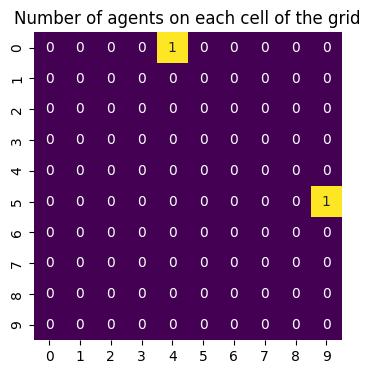

In [16]:
# Visualize the grid

map = np.zeros((model.grid.width, model.grid.height))
for cell_content, (x, y) in model.grid.coord_iter():
    if len(cell_content) > 0:
        for item in cell_content:
            if isinstance(item, SimpleRobot):
                map[x][y] = 1

    agent_count = len(cell_content)
    map[x][y] = agent_count

# Plot using seaborn
g = sns.heatmap(map, cmap="viridis", annot=True, cbar=False, square=True)
g.figure.set_size_inches(4, 4)
g.set(title="Number of agents on each cell of the grid");